# basic function

In [1]:
import numpy as np

In [2]:
a=np.concatenate(([3],[0]*5,np.arange(-1,1.002,2/9.0)))

In [3]:
print a

[ 3.          0.          0.          0.          0.          0.         -1.
 -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111  0.33333333
  0.55555556  0.77777778  1.        ]


In [4]:
a=np.r_[3,[0]*5,-1:1:10j]
print a

[ 3.          0.          0.          0.          0.          0.         -1.
 -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111  0.33333333
  0.55555556  0.77777778  1.        ]


In [5]:
np.mgrid[0:5,0:5]

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [6]:
np.mgrid[0:5]

array([0, 1, 2, 3, 4])

In [7]:
np.mgrid[:3,:2]

array([[[0, 0],
        [1, 1],
        [2, 2]],

       [[0, 1],
        [0, 1],
        [0, 1]]])

In [8]:
from numpy import poly1d
p=poly1d([3,4,5])
print p

   2
3 x + 4 x + 5


In [9]:
p(1)

12

In [10]:
p(-2)

9

In [11]:
p*p

poly1d([ 9, 24, 46, 40, 25])

In [12]:
print p*p 

   4      3      2
9 x + 24 x + 46 x + 40 x + 25


In [13]:
p([1,-2])

array([12,  9])

In [14]:
def addsubtract(a,b):
    if a>b:
        return a-b
    else:
        return a+b

In [15]:
vec_addsubtract=np.vectorize(addsubtract)
vec_addsubtract([0,3,6,9],[1,3,5,7])

array([1, 6, 1, 2])

# Opitimizaiton(scipy.optimize)

refer to [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)

## unconstrained minimization of multivariate scalar functions(minimuze)

In [16]:
import numpy as np
from scipy.optimize import minimize

In [17]:
def rosen(x):
    '''
    The Rosenbrock function
    '''
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0+(1-x[:-1])**2.0)

In [18]:
x0=np.array([1.3,0.7,0.8,1.9,1.2])

In [19]:
res=minimize(rosen,x0,method='nelder-mead',options={'xtol':1e-8,'disp':True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [20]:
print res

 final_simplex: (array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.00000001,  1.00000001],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  0.99999999]]), array([  4.86115343e-17,   7.65182843e-17,   8.11395684e-17,
         8.63263255e-17,   8.64080682e-17,   2.17927418e-16]))
           fun: 4.8611534334221152e-17
       message: 'Optimization terminated successfully.'
          nfev: 571
           nit: 339
        status: 0
       success: True
             x: array([ 1.,  1.,  1.,  1.,  1.])


In [21]:
print res.x

[ 1.  1.  1.  1.  1.]


# interpolation(scipy.interpolate)

### 1-D interpolation(interp1d)

In [22]:
from scipy.interpolate import interp1d
x=np.linspace(0,10,num=11,endpoint=True)
print x

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


In [23]:
y=np.cos(-x**2/9.0)
print y

[ 1.          0.99383351  0.90284967  0.54030231 -0.20550672 -0.93454613
 -0.65364362  0.6683999   0.67640492 -0.91113026  0.11527995]


In [24]:
x**2/9.0

array([  0.        ,   0.11111111,   0.44444444,   1.        ,
         1.77777778,   2.77777778,   4.        ,   5.44444444,
         7.11111111,   9.        ,  11.11111111])

In [25]:
f=interp1d(x,y)
f2=interp1d(x,y,kind='cubic')

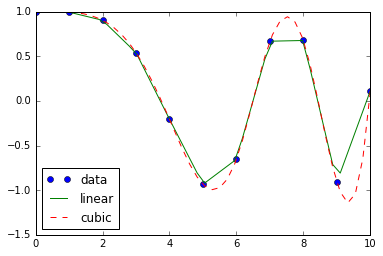

In [26]:
xnew=np.linspace(1,10,num=41,endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x,y,'o',xnew,f(xnew),'-',xnew,f2(xnew),'--')
plt.legend(['data','linear','cubic'],loc='best')
plt.show()

### multivariate data interpolation(griddata)

In [27]:
def func(x,y):
    return x*(1-x)*np.cos(4*np.pi*x)*np.sin(4*np.pi*y**2)**2

In [28]:
grid_x,grid_y=np.mgrid[0:1:100j,0:1:200j]
print grid_x

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.01010101  0.01010101  0.01010101 ...,  0.01010101  0.01010101
   0.01010101]
 [ 0.02020202  0.02020202  0.02020202 ...,  0.02020202  0.02020202
   0.02020202]
 ..., 
 [ 0.97979798  0.97979798  0.97979798 ...,  0.97979798  0.97979798
   0.97979798]
 [ 0.98989899  0.98989899  0.98989899 ...,  0.98989899  0.98989899
   0.98989899]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]]


In [29]:
grid_x.shape

(100L, 200L)

In [30]:
points=np.random.rand(200,2)
values=func(points[:,0],points[:,1])

In [33]:
from scipy.interpolate import griddata
grid_z0=griddata(points,values,(grid_x,grid_y),method='nearest')
grid_z1=griddata(points,values,(grid_x,grid_y),method='linear')
grid_z2=griddata(points,values,(grid_x,grid_y),method='cubic')


# numpy

In [36]:
np.array?

In [37]:
np.lookfor('create  array')

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArray.__new__
    Create a new masked array from scratch.
numpy.lib.ar

In [38]:
np.con*?

In [39]:
c=np.linspace(0,1,6)
c

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [40]:
a=np.ones((3,3))
a

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [41]:
np.zeros((2,2))

array([[ 0.,  0.],
       [ 0.,  0.]])

In [42]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [43]:
np.diag(np.array(range(4)))

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

In [45]:
np.random.rand(4) #uniform in [0,1]

array([ 0.18083633,  0.70286685,  0.92838351,  0.04694278])

In [46]:
np.random.randn(4) #Gaussian

array([-0.50059577, -0.43913745, -0.44147644,  0.08724812])

In [47]:
np.random.seed(1234) #setting the random seed

In [48]:
%matplotlib

Using matplotlib backend: TkAgg


In [49]:
%matplotlib inline

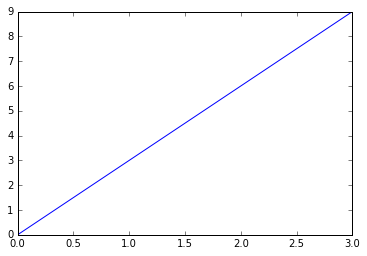

In [50]:
import matplotlib.pyplot as plt
x=np.linspace(0,3,20)
y=np.linspace(0,9,20)
plt.plot(x,y)  #line plot

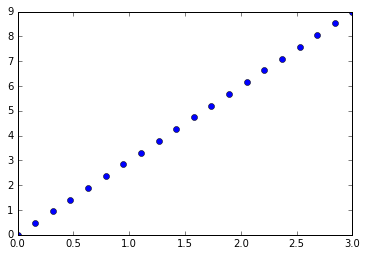

In [51]:
plt.plot(x,y,'o') #dot plot

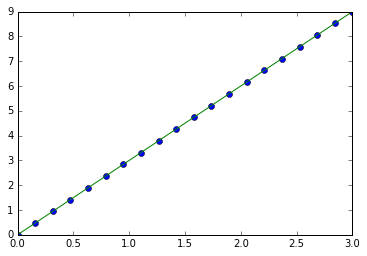

In [53]:
plt.plot(x,y,'o')
plt.plot(x,y)

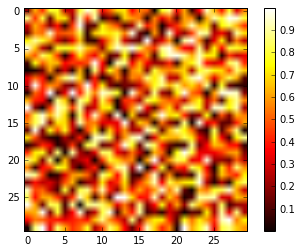

In [54]:
image=np.random.rand(30,30)
plt.imshow(image,cmap=plt.cm.hot)
plt.colorbar()

### Fancy indexing

In [57]:
np.random.seed(3)
a=np.random.randint(0,20,15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 12,  7, 14, 17])

In [58]:
(a%3==0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True,  True, False, False, False], dtype=bool)

In [59]:
mask=(a%3==0)

In [60]:
extract_from_a=a[mask] #extract a sub-array with the mask

In [61]:
extract_from_a

array([ 3,  0,  9,  6,  0, 12])

In [62]:
a[a%3==0]=-1

In [63]:
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, -1,  7, 14, 17])

#### indexing with an array of integers

In [64]:
a=np.arange(0,100,10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [65]:
a[[2,3,2,4,2]]

array([20, 30, 20, 40, 20])

## Numerical operations on array

### Array multiplication is not matrix multiplication:

In [66]:
c=np.ones((3,3))
c*c

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

### matrix multiplication

In [67]:
c.dot(c)

array([[ 3.,  3.,  3.],
       [ 3.,  3.,  3.],
       [ 3.,  3.,  3.]])

#### other operations

comparisions:

In [68]:
a=np.array([1,2,3,4])
b=np.array([4,2,2,4])
a==b

array([False,  True, False,  True], dtype=bool)

array-wise comparisons:

In [70]:
c=np.array([1,2,3,4])

In [71]:
np.array_equal(a,b)

False

In [72]:
np.array_equal(a,c)

True

transcendental functions:

In [73]:
a=np.arange(5)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [74]:
np.log(a)

array([       -inf,  0.        ,  0.69314718,  1.09861229,  1.38629436])

In [75]:
np.exp(a)

array([  1.        ,   2.71828183,   7.3890561 ,  20.08553692,  54.59815003])

transposition:

In [76]:
help(np.triu)

Help on function triu in module numpy.lib.twodim_base:

triu(m, k=0)
    Upper triangle of an array.
    
    Return a copy of a matrix with the elements below the `k`-th diagonal
    zeroed.
    
    Please refer to the documentation for `tril` for further details.
    
    See Also
    --------
    tril : lower triangle of an array
    
    Examples
    --------
    >>> np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
    array([[ 1,  2,  3],
           [ 4,  5,  6],
           [ 0,  8,  9],
           [ 0,  0, 12]])



In [77]:
a=np.triu(np.ones((3,3)),1)
a

array([[ 0.,  1.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.]])

In [78]:
a.T

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  1.,  0.]])

extrema:

In [79]:
x=np.array([1,3,2])
x.min()

1

In [80]:
x.argmax()
x.argmin()

0

Logical operations:

In [81]:
np.all([True,True,False])

False

In [82]:
np.any([True,True,False])

True

In [83]:
a=np.zeros((100,100))
np.any(a!=0)

False

In [84]:
np.all(a==a)

True

statistics:

In [85]:
x=np.array([1,2,3,4])
y=np.array([[1,2,3],[5,6,1]])
x.mean()

2.5

In [86]:
np.median(x)

2.5

In [88]:
y

array([[1, 2, 3],
       [5, 6, 1]])

In [87]:
np.median(y,axis=-1)

array([ 2.,  5.])

In [89]:
x.std()

1.1180339887498949

### Broadcasting

In [90]:
a=np.tile(np.arange(0,40,10),(3,1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [91]:
np.tile?

In [93]:
b=np.array([0,1,2])
a+b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [94]:
a=np.ones((4,5))
a[0]=2
a

array([[ 2.,  2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [99]:
a=np.arange(0,40,10)
a

array([ 0, 10, 20, 30])

In [100]:
a.shape

(4L,)

In [101]:
a=a[:,np.newaxis]
a

array([[ 0],
       [10],
       [20],
       [30]])

In [102]:
a.shape

(4L, 1L)

In [103]:
b

array([0, 1, 2])

In [104]:
a+b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

**Worded Example:Broadcasting** 

Let's construct an array of distances (in miles) between cities of Route66:Chicago,Springfield,SaintLouis,Tulsa,OklahomaCity,Amarillo,Santa Fe,Albuuqerque,Flagstaff and Los Angeles.

In [105]:
mileposts=np.array([0,198,303,736,871,1175,1475,1544,1913,2448])
distance_array=np.abs(mileposts-mileposts[:,np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

## Numerical operations on arrays

In [106]:
x,y=np.arange(5),np.arange(5)[:,np.newaxis]

In [107]:
x

array([0, 1, 2, 3, 4])

In [108]:
y

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [109]:
y.shape

(5L, 1L)

In [110]:
x**2+y**2

array([[ 0,  1,  4,  9, 16],
       [ 1,  2,  5, 10, 17],
       [ 4,  5,  8, 13, 20],
       [ 9, 10, 13, 18, 25],
       [16, 17, 20, 25, 32]])

In [111]:
distance=np.sqrt(x**2+y**2)

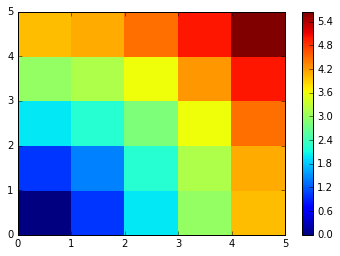

In [112]:
plt.pcolor(distance)
plt.colorbar()

In [115]:
x,y=np.ogrid[0:5,0:5]
x,y

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [116]:
np.ogrid?

In [117]:
x.shape,y.shape

((5L, 1L), (1L, 5L))

In [119]:
distance=np.sqrt(x**2+y**2)

In [121]:
x,y=np.mgrid[0:4,0:4]
x,y

(array([[0, 0, 0, 0],
        [1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]]), array([[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]]))

### Array shape manipulation

In [122]:
a=np.array([[1,2,3],[4,5,6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [123]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

In [124]:
a.shape

(2L, 3L)

In [125]:
b=a.ravel()
b=b.reshape((2,3))
b

array([[1, 2, 3],
       [4, 5, 6]])

In [127]:
a.reshape((2,-1)) #unspecified (-1) value is inferred

array([[1, 2, 3],
       [4, 5, 6]])

Adding a dimension

In [128]:
z=np.array([1,2,3])
z[:,np.newaxis]

array([[1],
       [2],
       [3]])

In [129]:
z[np.newaxis,:]

array([[1, 2, 3]])

**Resizing**

In [130]:
a=np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

### Sorting data

In [132]:
a=np.array([[4,3,5],[1,2,1]])
b=np.sort(a,axis=1)
b

array([[3, 4, 5],
       [1, 1, 2]])

sorting with fancy indexing

In [133]:
a=np.array([4,3,1,2])
j=np.argsort(a)
j

array([2, 3, 1, 0], dtype=int64)

In [134]:
a[j]

array([1, 2, 3, 4])

In [135]:
j_max=np.argmax(a)
j_min=np.argmin(a)
j_max,j_min

(0, 2)

## 3.3 More elaborate arrays

**Casting**

'Bigger' type wins in mixed-type operations:

In [136]:
np.array([1,2,3])+1.5

array([ 2.5,  3.5,  4.5])

In [137]:
a=np.array([1.7,1.2,1.6])
b=a.astype(int)
b

array([1, 1, 1])

In [138]:
a=np.array([1.2,1.5,1.8])
b=np.around(a)
b

array([ 1.,  2.,  2.])

### 3.5.2 Picture manipulation;Framing a Face

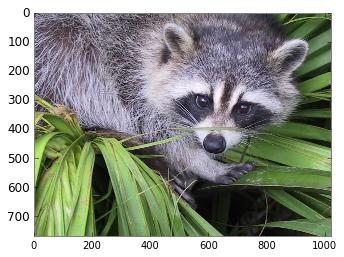

In [31]:
from scipy import misc
import matplotlib.pyplot as plt
face=misc.face()
plt.imshow(face)

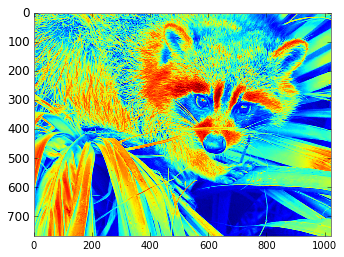

In [32]:
face=misc.face(gray=True)
plt.imshow(face)

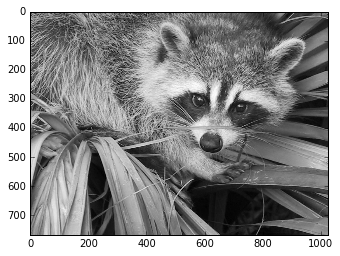

In [145]:
plt.imshow(face,cmap=plt.cm.gray)

# chapter 4 Matplotlib:plotting

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
import numpy as np

X=np.linspace(-np.pi,np.pi,256,endpoint=True)
C,S=np.cos(X),np.sin(X)

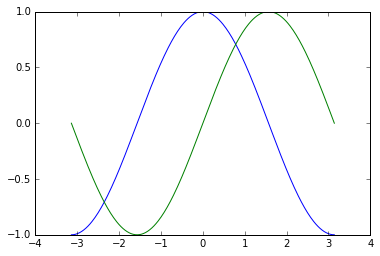

In [4]:
plt.plot(X,C)
plt.plot(X,S)

plt.show()

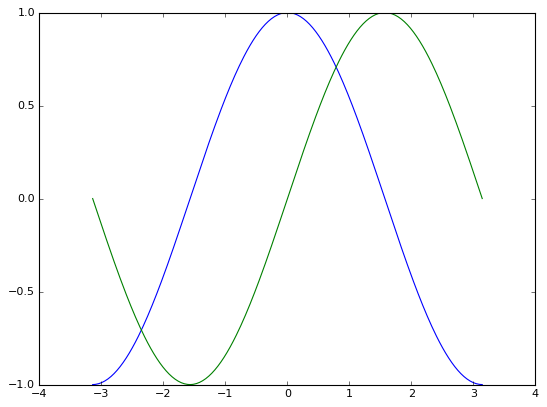

In [5]:
#create a figure of size 8x6 inches,80 dots per inch
plt.figure(figsize=(8,6),dpi=80)

#create a new subplot from a grid of 1x1
plt.subplot(1,1,1)

X=np.linspace(-np.pi,np.pi,256,endpoint=True)
C,S=np.cos(X),np.sin(X)

#Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X,C,color='blue',linewidth=1.0,linestyle='-')

#plot sine with a green continuous line of width 1 (pixels)
plt.plot(X,S,color='green',linewidth=1.0,linestyle='-')

#Set x limits
plt.xlim(-4.0,4.0)

#Set x ticks
plt.xticks(np.linspace(-4,4,9,endpoint=True))

#Set y limits
plt.ylim(-1.0,1.0)

#Set y ticks
plt.yticks(np.linspace(-1,1,5,endpoint=True))

#save figure using 72 dots per inch
#plt.savefig('study_2.png',dpi=72)

#show result on screen
plt.show()

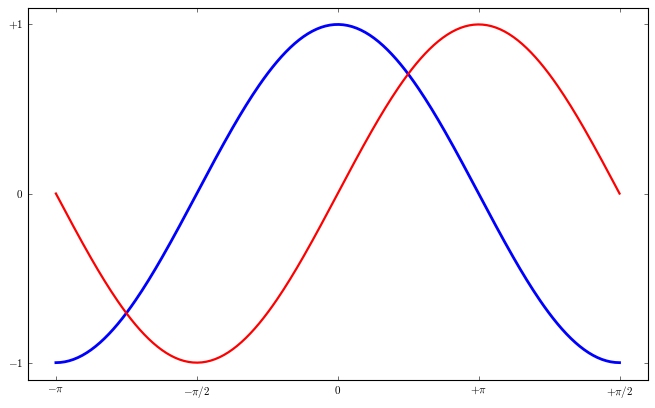

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X=np.linspace(-np.pi,np.pi,256,endpoint=True)
C,S=np.cos(X),np.sin(X)

plt.figure(figsize=(10,6),dpi=80)
plt.plot(X,C,color='blue',linewidth=2.5,linestyle='-')
plt.plot(X,S,color='red',linewidth=2.0,linestyle='-')


plt.xlim(X.min()*1.1,X.max()*1.1)
plt.ylim(C.min()*1.1,C.max()*1.1)

plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],
           [r'$-\pi$',r'$-\pi/2$',r'$0$',r'$+\pi$',r'$+\pi/2$',r'$+\pi$'])
plt.yticks([-1,0,+1],
          [r'$-1$',r'$0$',r'$+1$'])

#save figure using 72 dots per inch
#plt.savefig('study_2.png',dpi=72)

#show result on screen
plt.show()

**Moving spines**

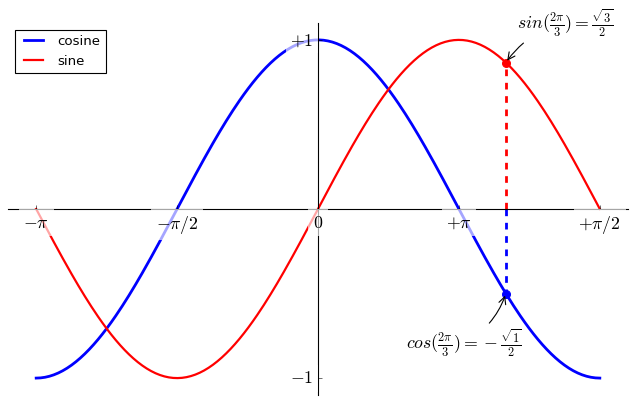

In [28]:
import numpy as np
import matplotlib.pyplot as plt

X=np.linspace(-np.pi,np.pi,256,endpoint=True)
C,S=np.cos(X),np.sin(X)

#create a figure of size 10x6 inches,80 dots per inch
plt.figure(figsize=(10,6),dpi=80)

#create a new subplot from a grid of 1x1
plt.subplot(1,1,1)

#plot consine with a blue continuous line of with 2.5 (pixels),adding a label named 'cosine' to be 
#added as the legend below
plt.plot(X,C,color='blue',linewidth=2.5,linestyle='-',label='cosine')
plt.plot(X,S,color='red',linewidth=2.0,linestyle='-',label='sine')

#set x limits and y limits
plt.xlim(X.min()*1.1,X.max()*1.1)
plt.ylim(C.min()*1.1,C.max()*1.1)

'''
When we set tick values,we can also provide a corresponding label in the second
argument list.Note that we'll use latex to allow for nice rendering of the label.
'''
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],
           [r'$-\pi$',r'$-\pi/2$',r'$0$',r'$+\pi$',r'$+\pi/2$',r'$+\pi$'])
# plt.yticks([-1,0,+1],
#           [r'$-1$',r'$0$',r'$+1$'])
plt.yticks([-1,+1],
          [r'$-1$',r'$+1$'])

'''
Spines are the lines connecting the axis tick marks and noting the boundaries of the data
area.They can be placed at arbitrary positions
'''
ax=plt.gca() #gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#add legend
plt.legend(loc='upper left')


#Annotate some points
t=2*np.pi/3
plt.plot([t,t],[0,np.cos(t)],color='blue',linewidth=2.5,linestyle='--')
plt.scatter([t],[np.cos(t)],50,color='blue')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
            xy=(t,np.sin(t)),xycoords='data',
            xytext=(+10,+30),textcoords='offset points',fontsize=16,
            arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'))

plt.plot([t,t],[0,np.sin(t)],color='red',linewidth=2.5,linestyle='--')
plt.scatter([t],[np.sin(t)],50,color='red')

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{\sqrt{1}}{2}$',
            xy=(t,np.cos(t)),xycoords='data',
            xytext=(-90,-50),textcoords='offset points',fontsize=16,
            arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'))

'''
devil is in the details
The tick labels are now hardly visible because of the blue and red lines.We can make them bigger and 
we can also adjust their properties such that they'll be rendered on a semi-transparent white background.
This will allow us to see both the data and the labels
'''
for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white',edgecolor='None',alpha=0.65))


#show result on screen
plt.show()

#save figure using 72 dots per inch
#plt.savefig('study_2.png',dpi=72)

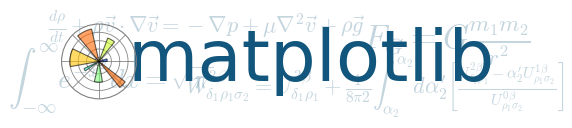

In [29]:
"""
==========
matplotlib
==========

Thanks to Tony Yu <tsyu80@gmail.com> for the logo design
"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.edgecolor'] = 'gray'


axalpha = 0.05
figcolor = 'white'
dpi = 80
fig = plt.figure(figsize=(6, 1.1), dpi=dpi)
fig.figurePatch.set_edgecolor(figcolor)
fig.figurePatch.set_facecolor(figcolor)


def add_math_background():
    ax = fig.add_axes([0., 0., 1., 1.])

    text = []
    text.append(
        (r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
         r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2}"
         r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 "
         r"\left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - "
         r"\alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} "
         r"}{U^{0\beta}_{\rho_1 \sigma_2}}\right]$", (0.7, 0.2), 20))
    text.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} "
                 r"= -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$",
                 (0.35, 0.9), 20))
    text.append((r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$",
                 (0.15, 0.3), 25))
    text.append((r"$F_G = G\frac{m_1m_2}{r^2}$",
                 (0.85, 0.7), 30))
    for eq, (x, y), size in text:
        ax.text(x, y, eq, ha='center', va='center', color="#11557c",
                alpha=0.25, transform=ax.transAxes, fontsize=size)
    ax.set_axis_off()
    return ax


def add_matplotlib_text(ax):
    ax.text(0.95, 0.5, 'matplotlib', color='#11557c', fontsize=65,
            ha='right', va='center', alpha=1.0, transform=ax.transAxes)


def add_polar_bar():
    ax = fig.add_axes([0.025, 0.075, 0.2, 0.85], projection='polar')

    ax.axesPatch.set_alpha(axalpha)
    ax.set_axisbelow(True)
    N = 7
    arc = 2. * np.pi
    theta = np.arange(0.0, arc, arc/N)
    radii = 10 * np.array([0.2, 0.6, 0.8, 0.7, 0.4, 0.5, 0.8])
    width = np.pi / 4 * np.array([0.4, 0.4, 0.6, 0.8, 0.2, 0.5, 0.3])
    bars = ax.bar(theta, radii, width=width, bottom=0.0)
    for r, bar in zip(radii, bars):
        bar.set_facecolor(cm.jet(r/10.))
        bar.set_alpha(0.6)

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(False)

    for line in ax.get_ygridlines() + ax.get_xgridlines():
        line.set_lw(0.8)
        line.set_alpha(0.9)
        line.set_ls('-')
        line.set_color('0.5')

    ax.set_yticks(np.arange(1, 9, 2))
    ax.set_rmax(9)



main_axes = add_math_background()
add_polar_bar()
add_matplotlib_text(main_axes)
plt.show()

### 4.2.8 Adding a legend

In [1]:
import pdir
pdir('request')

abstract class:
    __subclasshook__
arithmetic:
    __add__, __mod__, __mul__, __rmod__, __rmul__
attribute access:
    __delattr__, __getattribute__, __setattr__
emulating container:
    __contains__, __getitem__, __len__
object customization:
    __format__, __hash__, __init__, __new__, __repr__, __sizeof__, __str__
other:
    __getslice__
pickle:
    __getnewargs__, __reduce__, __reduce_ex__
rich comparison:
    __eq__, __ge__, __gt__, __le__, __lt__, __ne__
special attribute:
    __class__, __doc__
function:
    _formatter_field_name_split: 
    _formatter_parser: 
    capitalize: S.capitalize() -> string
    center: S.center(width[, fillchar]) -> string
    count: S.count(sub[, start[, end]]) -> int
    decode: S.decode([encoding[,errors]]) -> object
    encode: S.encode([encoding[,errors]]) -> object
    endswith: S.endswith(suffix[, start[, end]]) -> bool
    expandtabs: S.expandtabs([tabsize]) -> string
    find: S.find(sub [,start [,end]]) -> int
    format: S.format(*args, *

# chapter 5 Scipy:high-level scientific computing

In [1]:
from scipy import linalg
import numpy as np
arr=np.array([[1,2],
             [3,4]])
linalg.det(arr)

-2.0

In [2]:
iarr=linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

singular-value decomposition(SVD)

In [3]:
arr=np.arange(9).reshape((3,3))+np.diag([1,0,1])
uarr,spec,vharr=linalg.svd(arr)

In [4]:
spec

array([ 14.88982544,   0.45294236,   0.29654967])

### 5.5 Optimization and fit: scipy.optimize

In [9]:
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline
def f(x):
    return x**2+10*np.sin(x)

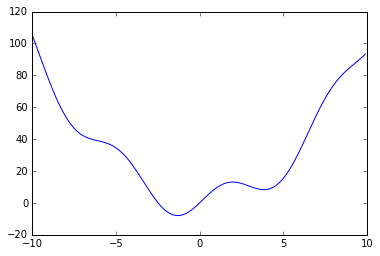

In [10]:
x=np.arange(-10,10,0.1)
plt.plot(x,f(x))
plt.show()

In [13]:
import pdir
pdir(optimize)

module attribute:
    __file__, __name__, __package__, __path__
other:
    __all__, __builtins__, _basinhopping, _cobyla, _differentialevolution, _group_columns, _hungarian, _lbfgsb, _linprog, _lsq, _minimize, _minpack, _nnls, _numdiff, _root, _slsqp, _spectral, _trustregion, _trustregion_dogleg, _trustregion_ncg, _zeros, absolute_import, cobyla, division, lbfgsb, linesearch, minpack, minpack2, moduleTNC, nonlin, optimize, print_function, s, slsqp, tnc, zeros
special attribute:
    __doc__
class:
    LbfgsInvHessProduct: Linear operator for the L-BFGS approximate inverse Hessian.
    OptimizeResult: Represents the optimization result.
    Tester: Nose test runner.
exception:
function:
    anderson: Find a root of a function, using (extended) Anderson mixing.
    approx_fprime: Finite-difference approximation of the gradient of a scalar function.
    basinhopping: Find the global minimum of a function using the basin-hopping algorithm
    bench: Run benchmarks for module using nose.
   

In [15]:
optimize.fmin_bfgs(f,0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.30644012])

**A possible issue with this is that,if the function has local minima the algorithm may find these local minima instead of the global minimum depending on the inital point:**

# <center>visualization</center>

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
iris=sns.load_dataset('iris')

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


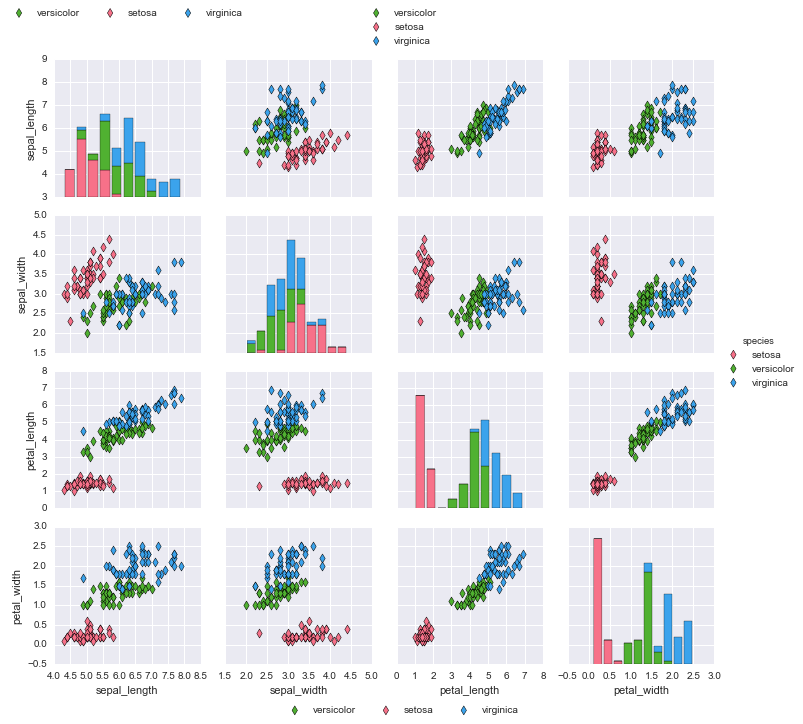

In [25]:
g = sns.pairplot(iris, hue='species', palette='husl', markers='d', size=2.5, plot_kws=
    {
    "s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'
    })

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)
g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3)
g.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=3)
g.fig.subplots_adjust(top=0.92, bottom=0.08)

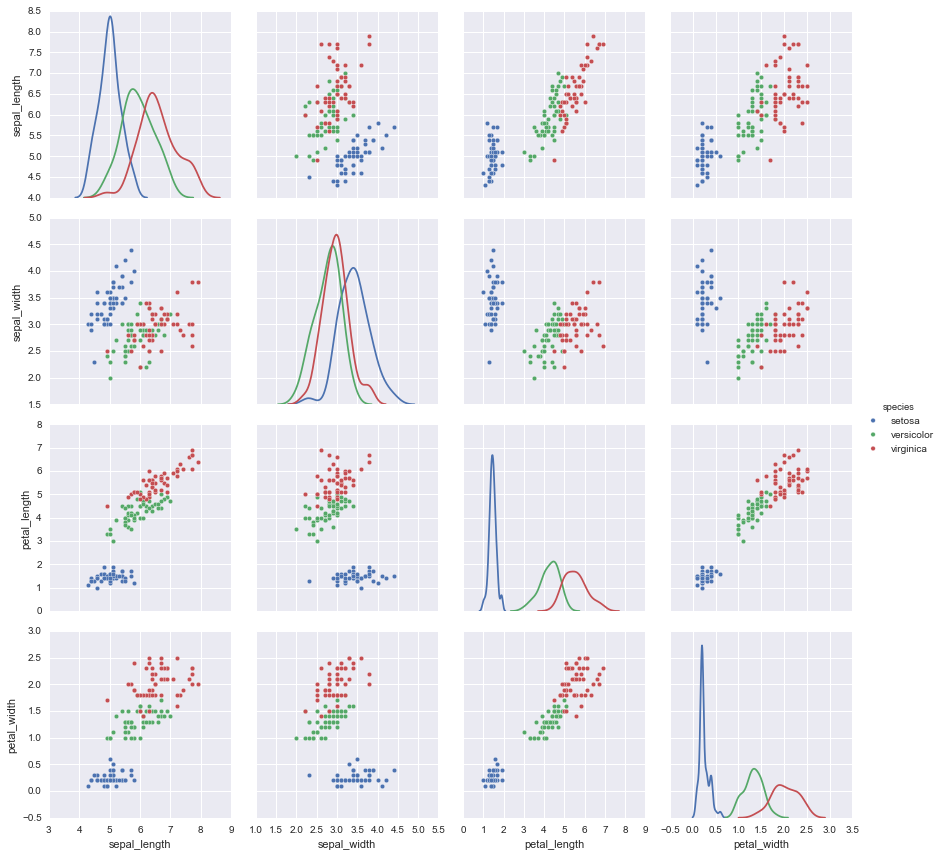

In [28]:
sns.pairplot(iris, hue="species", size=3, diag_kind="kde")  

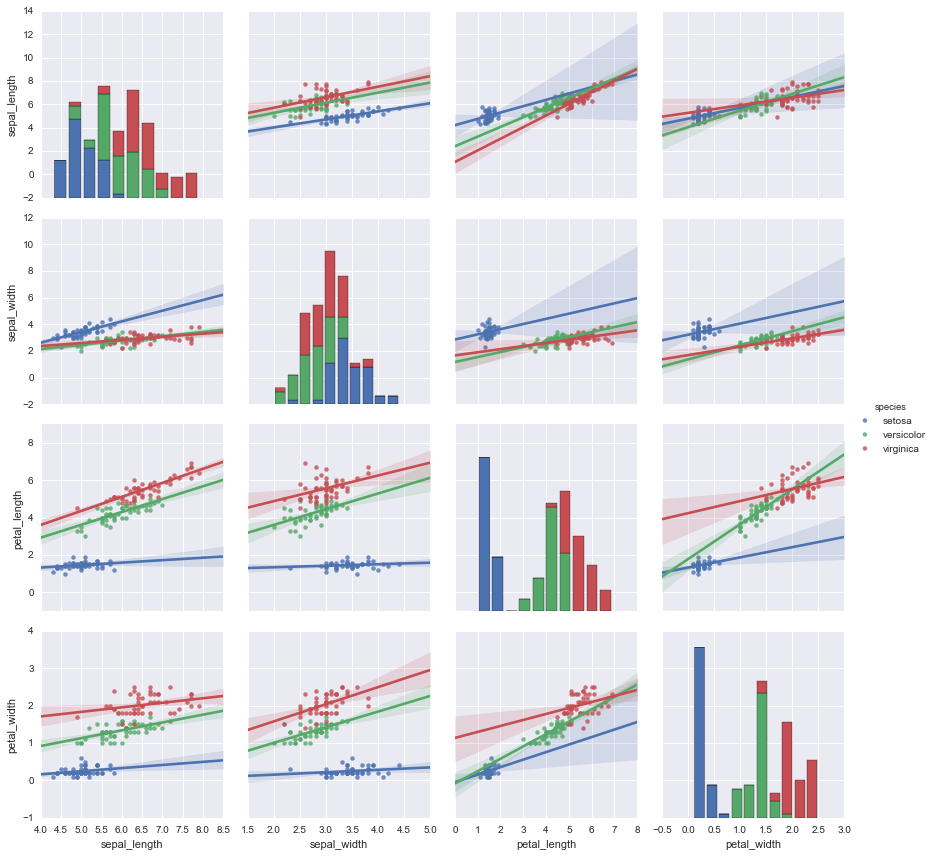

In [30]:
sns.pairplot(iris, hue="species", size=3, kind="reg")  

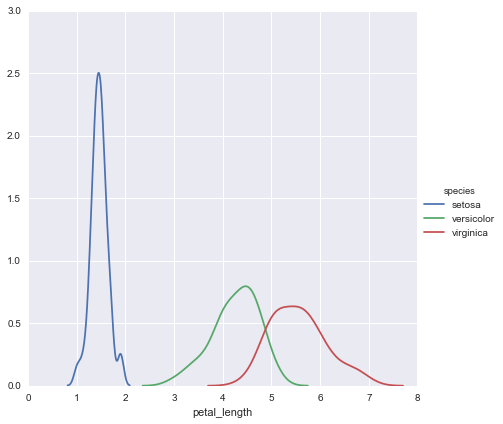

In [18]:
sns.FacetGrid(iris,hue='species',size=6).map(sns.kdeplot,'petal_length').add_legend()

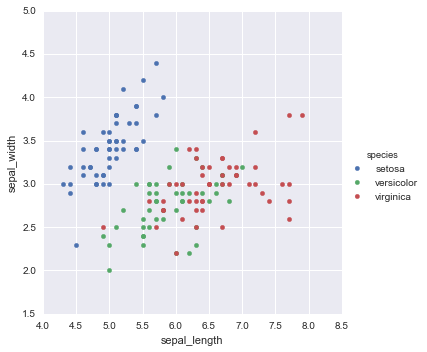

In [20]:
sns.FacetGrid(iris,hue='species',size=5).map(plt.scatter,'sepal_length','sepal_width').add_legend()

In [11]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


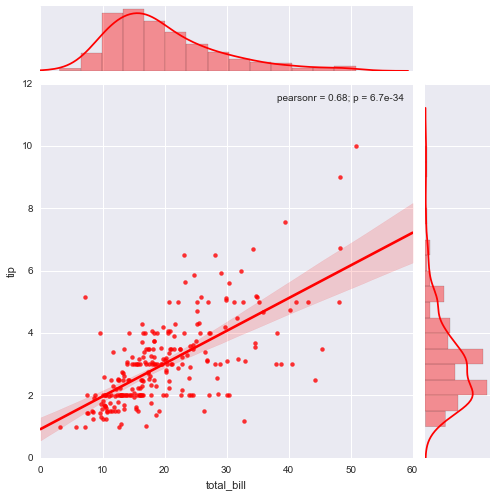

In [15]:
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)